In [23]:
import yfinance as yf
import pandas as pd

tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')

tesla_data.reset_index(inplace=True)

print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA
0      2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
1      2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2      2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
3      2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
4      2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    tables = soup.find_all('table')
    
    if len(tables) > 1: 
        second_table = tables[1]
        tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
        
        for row in second_table.find("tbody").find_all("tr"):
            col = row.find_all('td')
            if len(col) >= 2:  # Assurez-vous qu'il y a suffisamment de colonnes
                date = col[0].text.strip()
                revenue = col[1].text.strip()
                
                if revenue:
                    new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                    
                    tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)
        
        tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        
        tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
        
        print(tesla_revenue)
    else:
        print("Aucune table trouvée.")
else:
    print(response.status_code)


          Date  Revenue
0   2024-12-31    25707
1   2024-09-30    25182
2   2024-06-30    25500
3   2024-03-31    21301
4   2023-12-31    25167
..         ...      ...
57  2010-09-30       31
58  2010-06-30       28
59  2010-03-31       21
60  2009-09-30       46
61  2009-06-30       27

[62 rows x 2 columns]


In [32]:
ticker_symbol = 'GME'

gme_data = yf.download(ticker_symbol, start='2020-01-01', end='2023-12-31')

print(gme_data.head())

gme_data.to_csv('gamestop_stock_data.csv')

[*********************100%***********************]  1 of 1 completed

Price        Close    High     Low    Open    Volume
Ticker         GME     GME     GME     GME       GME
Date                                                
2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


In [42]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all('table')

print(f"Number of tables found: {len(tables)}")  # Debugging line

if len(tables) > 1:
    second_table = tables[1]
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
    
    for row in second_table.find("tbody").find_all("tr"):
        col = row.find_all('td')
        if len(col) >= 2:
            date = col[0].text.strip()
            revenue = col[1].text.strip()
            new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
            gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)
    
    gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    gme_revenue.dropna(subset=['Revenue'], inplace=True)
    gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
    
    print(gme_revenue)
else:
    print("No table found.")



Number of tables found: 6
          Date  Revenue
0   2024-10-31    860.0
1   2024-07-31    798.0
2   2024-04-30    882.0
3   2024-01-31   1794.0
4   2023-10-31   1078.0
..         ...      ...
59  2010-01-31   3524.0
60  2009-10-31   1835.0
61  2009-07-31   1739.0
62  2009-04-30   1981.0
63  2009-01-31   3492.0

[64 rows x 2 columns]


[*********************100%***********************]  1 of 1 completed


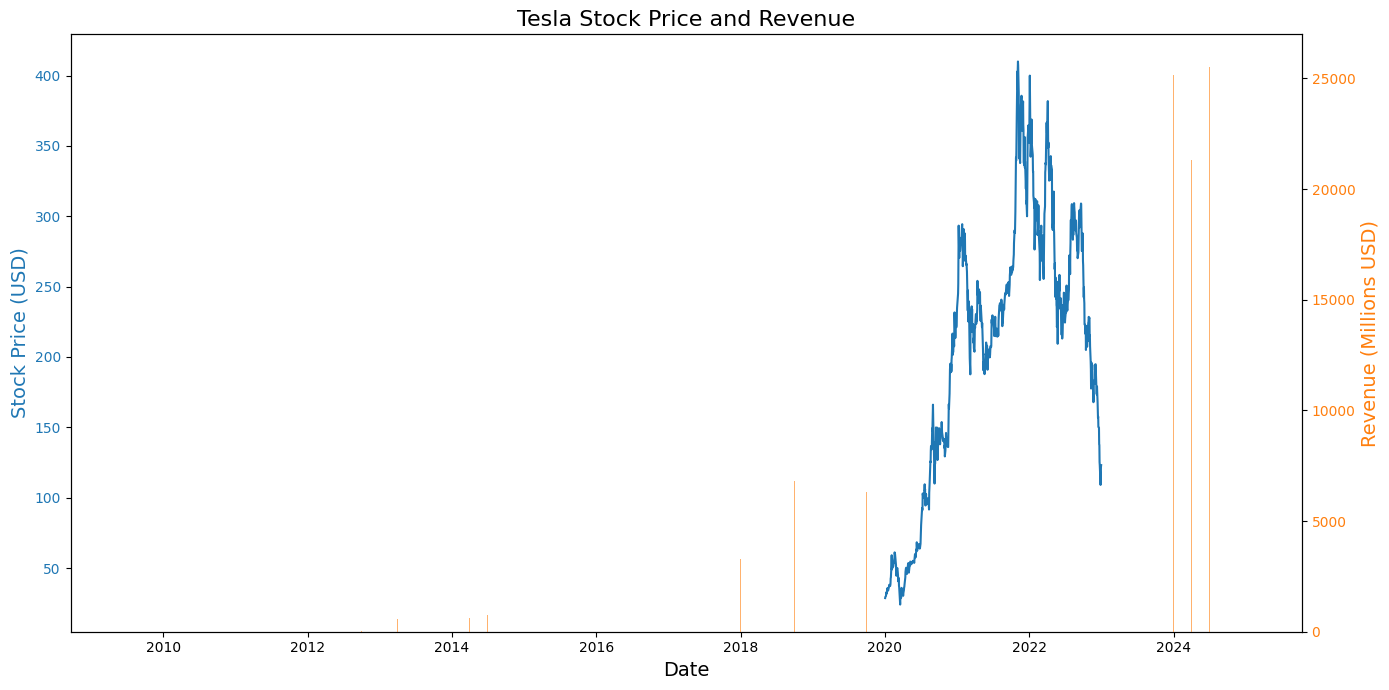

In [43]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')
tesla_data.reset_index(inplace=True)

tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_title('Tesla Stock Price and Revenue', fontsize=16)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Stock Price (USD)', fontsize=14, color='tab:blue')
ax1.plot(tesla_data['Date'], tesla_data['Close'], color='tab:blue', label='Stock Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Revenue (Millions USD)', fontsize=14, color='tab:orange')
ax2.bar(tesla_revenue['Date'], tesla_revenue['Revenue'], color='tab:orange', alpha=0.6, label='Revenue')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


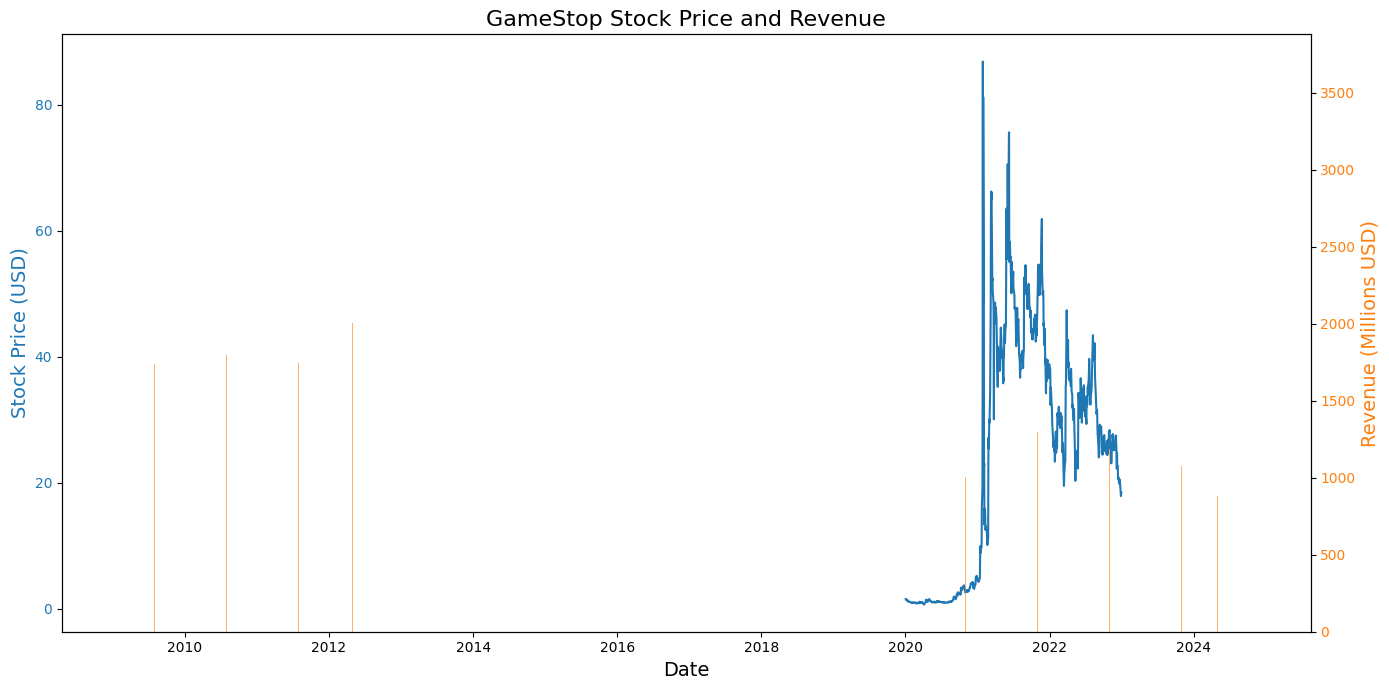

In [44]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    ax1.set_title('GameStop Stock Price and Revenue', fontsize=16)
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Stock Price (USD)', fontsize=14, color='tab:blue')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Revenue (Millions USD)', fontsize=14, color='tab:orange')
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], color='tab:orange', alpha=0.6, label='Revenue')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    fig.tight_layout()
    plt.show()

gme_data = yf.download('GME', start='2020-01-01', end='2023-01-01')
gme_data.reset_index(inplace=True)

gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

make_graph(gme_data, gme_revenue)
